<a href="https://colab.research.google.com/github/cyrus2281/notes/blob/main/MachineLearning/Supervised_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Content

>[Content](#scrollTo=lNJVlBSleb9C&uniqifier=1)

>[Supervised Machine Learning](#scrollTo=dBVtPOeqee8j&uniqifier=1)

>>[K-Nearest Neighbor](#scrollTo=GiFmXSDcfvBK&uniqifier=1)

>>>[Python Implementation](#scrollTo=pclzB7I9ON6D&uniqifier=1)

>>>[KNN can fail](#scrollTo=Gn6xvWSBRAH-&uniqifier=1)

>>[Bayes Classifier](#scrollTo=rYLOrTXKU3ov&uniqifier=1)

>>>[Probability Density](#scrollTo=DbCHAW1mVXa4&uniqifier=1)

>>>[Multi-Dimensional Gaussian](#scrollTo=B8Ac4aa0Xpa8&uniqifier=1)

>>>[Bayes Rule](#scrollTo=Wli3S-EbZipv&uniqifier=1)

>>>[Binomial Distribution](#scrollTo=ZUfMbkeTmlqS&uniqifier=1)

>>>[Bernoulli  Distribution](#scrollTo=QtN01vx8n8G2&uniqifier=1)

>>>[Naive Bayes](#scrollTo=e7zWB3Xj3B4c&uniqifier=1)

>>>[Non-Naive Bayes](#scrollTo=ZwEfMUAW68yL&uniqifier=1)

>>[Decision Tree](#scrollTo=-0SxkPVH_8rq&uniqifier=1)

>>>[Information Entropy](#scrollTo=K-U3dGgVCyWw&uniqifier=1)

>>>>[Maximizing Information Gain](#scrollTo=wEjH47-bEhGe&uniqifier=1)

>>>[Calculating Information Gain](#scrollTo=k3fhybT7GAzH&uniqifier=1)

>>>>[Choosing the best split](#scrollTo=8qgna9JqJOGF&uniqifier=1)

>>>[Python Implementation](#scrollTo=w4hrBtoiKZ_Q&uniqifier=1)

>>[Perceptron](#scrollTo=DZPl5z5Ky7Ng&uniqifier=1)

>>>[Python Implementation](#scrollTo=s1eQzZya5BM6&uniqifier=1)



# Supervised Machine Learning

**Supervised ML:**
- Give X (inputs), Y (targets)
- Try to learn to predict target given input
- 2 main functions: `train(X,Y)` and `predict(X)`

**Unsupervised ML:**
- Given X only
- Try to learn structure of the data, density estimation (`p(x)`), clustering

Supervised learning can be categorized further:

**Classification**
- Labels are discrete
  - Whether or not it will rain tomorrow
  - Whether or not Google's stock price will rise or fall tomorrow

**Regression**
- Labels are real numbers
  - Trying to predict amount of rainfall tomorrow
  - Trying to predict the value of Google's stock price

**Data types and shapes**

- X is a matrix of shape N×D
- N = number of samples
- D = number of features
- Y is a vector of shapes N×1
  - Regression: will contain float values
  - Classification: will contain integers from 0…K-1, where K = number of classes

**Generalization and Overfitting**

- Generalization: Predict accurately not only for data we trained on, but new data we haven't seen before

- Usually split data into train/test sets to get an idea of how well a model will generalize

- This is only "pretend" test data since "real" test data we won't know the answer to (i.e. tomorrow's stock price)

- If we get 100% accuracy on training data, but only 55% accuracy on test data, that's a sign of "overfitting"

## K-Nearest Neighbor

To make a prediction, use closest knwon data points.

K is the number of neighbors which is a hyperparameter.

KNN is known as a **lazy classifier**. `train(X,Y)` doesn't do anything, just stores X and Y. `predict(X')` does all the work by looking through the stored X and Y.

Smaller value of `K` are more expressive/sensitive, where as larger values of `K` are more simple/smooth.

### Python Implementation

In [ ]:
# This is an example of a K-Nearest Neighbors classifier on MNIST data.
# https://deeplearningcourses.com/c/data-science-supervised-machine-learning-in-python


import numpy as np
import matplotlib.pyplot as plt
from sortedcontainers import SortedList
from datetime import datetime

class KNN(object):
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, X):
        y = np.zeros(len(X))
        for i,x in enumerate(X): # test points
            sl = SortedList() # stores (distance, class) tuples
            for j,xt in enumerate(self.X): # training points
                diff = x - xt
                d = diff.dot(diff)
                if len(sl) < self.k:
                    # don't need to check, just add
                    sl.add( (d, self.y[j]) )
                else:
                    if d < sl[-1][0]:
                        del sl[-1]
                        sl.add( (d, self.y[j]) )
            # vote
            votes = {}
            for _, v in sl:
                votes[v] = votes.get(v,0) + 1

            max_votes = 0
            max_votes_class = -1
            for v,count in votes.items():
                if count > max_votes:
                    max_votes = count
                    max_votes_class = v
            y[i] = max_votes_class
        return y

    def score(self, X, Y):
        P = self.predict(X)
        return np.mean(P == Y)

In [ ]:
def get_xor():
    X = np.zeros((200, 2))
    X[:50] = np.random.random((50, 2)) / 2 + 0.5 # (0.5-1, 0.5-1)
    X[50:100] = np.random.random((50, 2)) / 2 # (0-0.5, 0-0.5)
    X[100:150] = np.random.random((50, 2)) / 2 + np.array([[0, 0.5]]) # (0-0.5, 0.5-1)
    X[150:] = np.random.random((50, 2)) / 2 + np.array([[0.5, 0]]) # (0.5-1, 0-0.5)
    Y = np.array([0]*100 + [1]*100)
    return X, Y

def get_donut():
    N = 200
    R_inner = 5
    R_outer = 10

    # distance from origin is radius + random normal
    # angle theta is uniformly distributed between (0, 2pi)
    R1 = np.random.randn(N//2) + R_inner
    theta = 2*np.pi*np.random.random(N//2)
    X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T

    R2 = np.random.randn(N//2) + R_outer
    theta = 2*np.pi*np.random.random(N//2)
    X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T

    X = np.concatenate([ X_inner, X_outer ])
    Y = np.array([0]*(N//2) + [1]*(N//2))
    return X, Y

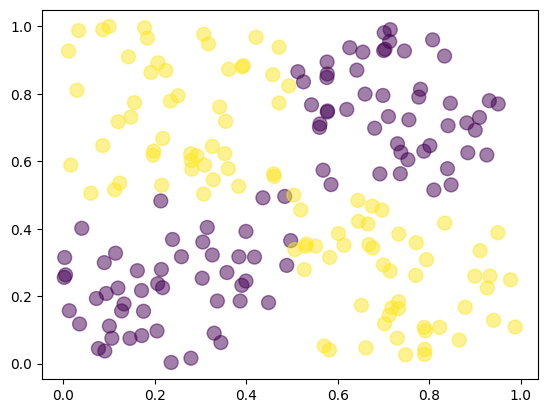

Accuracy: 0.98


In [ ]:
X, Y = get_xor()

# display the data
plt.scatter(X[:,0], X[:,1], s=100, c=Y, alpha=0.5)
plt.show()

# get the accuracy
model = KNN(3)
model.fit(X, Y)
print("Accuracy:", model.score(X, Y))

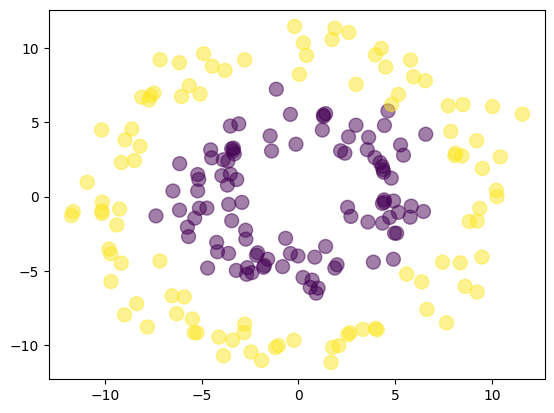

Accuracy: 1.0


In [ ]:
X, Y = get_donut()

# display the data
plt.scatter(X[:,0], X[:,1], s=100, c=Y, alpha=0.5)
plt.show()

# get the accuracy
model = KNN(3)
model.fit(X, Y)
print("Accuracy:", model.score(X, Y))

### KNN can fail

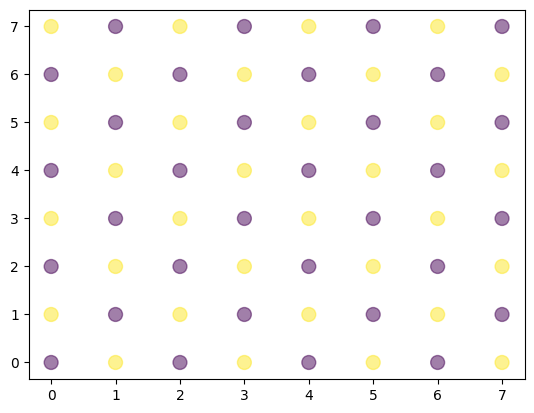

Train accuracy: 0.0


In [ ]:
def get_data():
    width = 8
    height = 8
    N = width * height
    X = np.zeros((N, 2))
    Y = np.zeros(N)
    n = 0
    start_t = 0
    for i in range(width):
        t = start_t
        for j in range(height):
            X[n] = [i, j]
            Y[n] = t
            n += 1
            t = (t + 1) % 2 # alternate between 0 and 1
        start_t = (start_t + 1) % 2
    return X, Y


X, Y = get_data()

# display the data
plt.scatter(X[:,0], X[:,1], s=100, c=Y, alpha=0.5)
plt.show()

# get the accuracy
model = KNN(3)
model.fit(X, Y)
print("Train accuracy:", model.score(X, Y))

## Bayes Classifier

Bayes Classifier is rooted in probability.


### Probability Density

The height of the curve is not a probability, it's a probability density.

$$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

`f(x)` is called PDF (probability density function)

- Note: For discrete variables we use PMF (probability mass function)

Bayes classifier (and Bayes rule) treats PDFs and PMFs the same way.

### Multi-Dimensional Gaussian

$$
f(x) = \frac{1}{\sqrt{(2\pi)^D|\Sigma|}}
e^{
  -\frac{1}{2}(x-\mu)^T
  \Sigma^{-1}(x-\mu)
  } \\[1cm]
\mu = \frac{1}{N} \sum_{i=1}^N x_i \\
\Sigma = \frac{1}{N-1} \sum_{i=1}^N (x_i - \mu)(x_i-\mu)^T
$$

- D = size of X = size of mean
- |𝚺| = D×D

### Bayes Rule

`p(y|x)` is the probability that y is some class, given the input feature x

$$
p(y|x) = \frac{p(x|y)\ p(y)}{p(x)}
$$

To get `p(x)`, we can use bayes rule again

$$
p(x,y) = p(x|y)p(y) \\
p(x) = \sum_y p(x,y)
$$

eg:

$
p(x) = p(x|y=0)p(y=0) + p(x|y=1)p(y=1)\\
$

\

- p(y|x) = Posterior
- p(x|y) = Likelihood
- p(y) = Prior
- p(x) = Evidence

For high dimensional data (eg D=1000), we can work with the log probabilities instead.

$$
\log(AB) = \log(A) + \log(B)
$$

since log() is monotonically increasing, the argmax rule produces the same result

$$
A > B, \log(A) > \log(B)\\
$$

$$
k^* = \text{argmax}_k \{
  \log p(x|y=k) + \log p(y=k)
  \} \\
$$


log PDFs are faster to calculate than PDF


### Binomial Distribution

If we have two discrete values, instead of the Gaussian distribution, we'd use the Binomial distribution.

$$
f(k) =  \binom{n}{k} \theta^k (1-\theta)^{n-k} \\
$$

- f(k) is a PMF (probability mass function)
- Unlike PDFs, the PMF returns an actual probability
- θ is the probability of success in a signl trial

For more than 2 discrete values, we can use multinomial distribution.





### Bernoulli  Distribution

If we only care about if something happens or not (boolean), we can used the Bernoulli  distribution

$$
f(k) = \theta^{1(k=1)}(1-\theta)^{1(k=0)} \\
$$

Probability of all outcomes sums up to one.

### Naive Bayes

Predicting X being category A, is count of all items in A that contains X divided by count of A.

With Bayesian rule, we can also say the probability of category A given X.

For example, for classifiy text, we'd have:

$$
P(\text{words} | C) = \prod_{w \in W} P(w|C) \prod_{w \notin W} (1-p(w|C))
$$

- W: Words in doc
- C: class


In [ ]:
# https://deeplearningcourses.com/c/data-science-supervised-machine-learning-in-python
# This is an example of a Naive Bayes classifier
import numpy as np
from datetime import datetime
from scipy.stats import norm
from scipy.stats import multivariate_normal as mvn

class NaiveBayes(object):
    def fit(self, X, Y, smoothing=1e-2):
        self.gaussians = dict()
        self.priors = dict()
        labels = set(Y)
        for c in labels:
            current_x = X[Y == c]
            self.gaussians[c] = {
                'mean': current_x.mean(axis=0),
                'var': current_x.var(axis=0) + smoothing,
            }
            self.priors[c] = float(len(Y[Y == c])) / len(Y)

    def score(self, X, Y):
        P = self.predict(X)
        return np.mean(P == Y)

    def predict(self, X):
        N, D = X.shape
        K = len(self.gaussians)
        P = np.zeros((N, K))
        for c, g in self.gaussians.items():
            mean, var = g['mean'], g['var']
            P[:,c] = mvn.logpdf(X, mean=mean, cov=var) + np.log(self.priors[c])
        return np.argmax(P, axis=1)


### Non-Naive Bayes

"Naive" means all inputs features are independent.

$$
p(X|C) = \prod_i p(X_i|C)
$$

Non-Naive means we just can't equate teh above (no independence)

It can be also model using Hidden Markov Models or Custom Bayes Net.

If 2 random variables are independent, their covariance is 0. The opposite is not true.

If $X_i$ and $X_j$ are Gaussian-distribution and cov($X_i, X_j$)=0, then $X_i$ and $X_j$ are independent.

- Naive Bayes: cov(i,j) = 0 for i $\ne$ j
- Non-Naive Bayes: cov(i,j) = anything

Non-Naive bayes is commonly known as **Bayes Classifier**, or more generally a **Bayes model**


In [ ]:
# https://deeplearningcourses.com/c/data-science-supervised-machine-learning-in-python
# This is an example of a Bayes classifier
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import norm
from scipy.stats import multivariate_normal as mvn

class Bayes(object):
    def fit(self, X, Y, smoothing=1e-2):
        N, D = X.shape
        self.gaussians = dict()
        self.priors = dict()
        labels = set(Y)
        for c in labels:
            current_x = X[Y == c]
            self.gaussians[c] = {
                'mean': current_x.mean(axis=0),
                'cov': np.cov(current_x.T) + np.eye(D)*smoothing,
            }
            self.priors[c] = float(len(Y[Y == c])) / len(Y)

    def score(self, X, Y):
        P = self.predict(X)
        return np.mean(P == Y)

    def predict(self, X):
        N, D = X.shape
        K = len(self.gaussians)
        P = np.zeros((N, K))
        for c, g in self.gaussians.items():
          # Changes from Naive Bayes
            mean, cov = g['mean'], g['cov']
            P[:,c] = mvn.logpdf(X, mean=mean, cov=cov) + np.log(self.priors[c])
        return np.argmax(P, axis=1)

## Decision Tree

At heart of the decision tree is the "if" statement.

Challenge, how to automate the process of creating these trees, and how do we find optimal thresholds?

One key feature: We only look at one attribute at a time. Usually called "input features", but here they're called "attributes".

Using trees makes the problemn inherently recursive.



**Pseudocode**

- Binary classification.
- Only 1 split per node (therefore each node has 0 or 2 children)
- If node has children, it does not have prediction, and vice versa

```python
class TreeNode:
    self.left_node
    self.right_node
    self.left_prediction
    self.right_prediction

  def predict_one(x):
    if self.condition(x):
      if self.left_node:
          return self.left_node.predict_one(x)
      else:
          return self.left_prediction
    else:
      if self.right_node:
          return self.right_node.predict_one(x)
      else:
          return self.right_prediction

```

### Information Entropy

- Related to variance
  - Wide variance: we don't know much about the data we will get
  - Slim variance: we can be more confident about the data we will get


Entroy = $E[\log_2(p)]$

$$
H(p) = - \sum_x p(x) \log p(x)
$$




---


Example: Binary random variable

P(x=1) = p

P(x=0) = 1 - p

entropy: H(p) = -p log(p) - (1-p)log(1-p)

What value of p maximized entroy?

Solve dH/dp = 0 for p

Answer p = 0.5




----


If p=0.5, there is no possible way to make a good prediction, we'll always have a probability of 50%.

if p=0.8, then we shold always predict 1 because that gives us the best chance of being correct

Entropy is a measure of how much information we get from finding out the value of the RV

#### Maximizing Information Gain

- How will we use information entropy to help us choose the best attributes in our data?
- We will NOT do ID3
  - Quick overview of ID3:
    - Call set of all attributes (columns) S = {a(1), a(2), ..., a(D)}
    - Find the attribute that best splits data based on having maximum
information gain (will be defined shortly), call it a(k)
    - Can split more than once (each TreeNode can have &gt;2 children) (e.g. dice roll would have 6 children)
    - Remove a(k) from S, i.e. S = S - {a{k)}, then repeat on split data
- We will implement a different version
- We will not require that an attribute can only be split once
  - E.g. can go from green to blue and back to green
- Only 1 split, each TreeNode has 0 or 2 children

### Calculating Information Gain

- We are most interested in the labels, suppose we have 0,0,1,1
- H(Y) = 1
- Suppose we have an attribute which can split the data perfectly
  - E.g. if X < 0, Y = 0, if X > 0, Y = 1
- Then we have the left node&#039;s Y_left = {0, 0}
- And the right node&#039;s Y_right = {1, 1}
- The entropy for each subset of data is 0
- The total information gain is:
  - IG(Y | split on X) = H(Y) - 0.5*H(Y_left) - 0.5*H(Y_right) = 1 -0.5*0 - 0.5*0 = 1
- The 0.5 means half the data went to the left, half went to right
- Ensures IG >= 0

**Fit Pseudocode**

```python
def fit(X,Y):
  best_ig = 0
  best_attribute = None
  for c in columns:
      condition = find_split(X,Y,c)
      Y_left = Y[X[c] meets condition]
      Y_right = Y[X[c] does not meets condition]

      information_gain = H(Y) - p(left)H(Y_left) - p(right)H(Y_right)
      if information_gain > best_ig:
        best_ig = information_gain
        best_attribute = c

  # Now must call fit recursively
  X_left, Y_left, X_right, Y_right = split by best_attribute
  self.left_node = TreeNode()
  self.left_node.fit(X_left, Y_left)
  self.right_node = TreeNode()
  self.right_node.fit(X_right, Y_right)
```




**Base Cases**

- We haven't checked for base cases yet, but they are needed when doing recursion
- Pseudocode was just to give you a rough outline
- First base case:
  - If max information gain = 0, we gain nothing from splitting, make this a leaf node
  - Predict most likely class (i.e. if a majority of labels in our subset of data is 1, predict 1)

**Overfitting**

- We want to avoid overfitting
- We can easily achieve 100% on training set by having a tree of arbitrary depth
- But may not lead to good generalization
- So we set a max depth
- when we hit max depth, stop recursing, make a leaf node
- means every TreeNode must know its own depth, and max depth

#### Choosing the best split

- continuous data → infinite number of places to split
- We only need to consider the midpoint between any 2 sorted X's
- Only need to consider boundaries between differing labels
  - Further from boundary → higher entropy → lower information gain



**Algorithm**

- Sort X's for current column in order, sort Y in the corresponding way
- Find all the boundary points where Y changes from one value to another
- Caculate information gain when splitting at each boundary
- Keep the split which gives the max information gain

### Python Implementation

In [ ]:
# https://deeplearningcourses.com/c/data-science-supervised-machine-learning-in-python
# Decision Tree for continuous-vector input, binary output
import numpy as np
from datetime import datetime

def entropy(y):
    # assume y is binary - 0 or 1
    N = len(y)
    s1 = (y == 1).sum()
    if 0 == s1 or N == s1:
        return 0
    p1 = float(s1) / N
    p0 = 1 - p1
    return -p0*np.log2(p0) - p1*np.log2(p1)

In [ ]:
class TreeNode:
    def __init__(self, depth=1, max_depth=None):
        print('depth:', depth)
        self.depth = depth
        self.max_depth = max_depth
        if self.max_depth is not None and self.max_depth < self.depth:
            raise Exception("depth > max_depth")

    def fit(self, X, Y):
        if len(Y) == 1 or len(set(Y)) == 1:
            # base case, only 1 sample
            # another base case
            # this node only receives examples from 1 class
            # we can't make a split
            self.col = None
            self.split = None
            self.left = None
            self.right = None
            self.prediction = Y[0]

        else:
            D = X.shape[1]
            cols = range(D)

            max_ig = 0
            best_col = None
            best_split = None
            for col in cols:
                ig, split = self.find_split(X, Y, col)
                if ig > max_ig:
                    max_ig = ig
                    best_col = col
                    best_split = split

            if max_ig == 0:
                # nothing we can do
                # no further splits
                self.col = None
                self.split = None
                self.left = None
                self.right = None
                self.prediction = np.round(Y.mean())
            else:
                self.col = best_col
                self.split = best_split

                if self.depth == self.max_depth:
                    self.left = None
                    self.right = None
                    self.prediction = [
                        np.round(Y[X[:,best_col] < self.split].mean()),
                        np.round(Y[X[:,best_col] >= self.split].mean()),
                    ]
                else:
                    left_idx = (X[:,best_col] < best_split)
                    Xleft = X[left_idx]
                    Yleft = Y[left_idx]
                    self.left = TreeNode(self.depth + 1, self.max_depth)
                    self.left.fit(Xleft, Yleft)

                    right_idx = (X[:,best_col] >= best_split)
                    Xright = X[right_idx]
                    Yright = Y[right_idx]
                    self.right = TreeNode(self.depth + 1, self.max_depth)
                    self.right.fit(Xright, Yright)

    def find_split(self, X, Y, col):
        # finding split for col
        x_values = X[:, col]
        sort_idx = np.argsort(x_values)
        x_values = x_values[sort_idx]
        y_values = Y[sort_idx]

        # Note: optimal split is the midpoint between 2 points
        # Note: optimal split is only on the boundaries between 2 classes

        # if boundaries[i] is true
        # then y_values[i] != y_values[i+1]
        # nonzero() gives us indices where arg is true
        # but for some reason it returns a tuple of size 1
        boundaries = np.nonzero(y_values[:-1] != y_values[1:])[0]
        best_split = None
        max_ig = 0
        for b in boundaries:
            split = (x_values[b] + x_values[b+1]) / 2
            ig = self.information_gain(x_values, y_values, split)
            if ig > max_ig:
                max_ig = ig
                best_split = split
        return max_ig, best_split

    def information_gain(self, x, y, split):
        # assume classes are 0 and 1
        # print "split:", split
        y0 = y[x < split]
        y1 = y[x >= split]
        N = len(y)
        y0len = len(y0)
        if y0len == 0 or y0len == N:
            return 0
        p0 = float(len(y0)) / N
        p1 = 1 - p0 #float(len(y1)) / N
        return entropy(y) - p0*entropy(y0) - p1*entropy(y1)

    def predict_one(self, x):
        # use "is not None" because 0 means False
        if self.col is not None and self.split is not None:
            feature = x[self.col]
            if feature < self.split:
                if self.left:
                    p = self.left.predict_one(x)
                else:
                    p = self.prediction[0]
            else:
                if self.right:
                    p = self.right.predict_one(x)
                else:
                    p = self.prediction[1]
        else:
            # corresponds to having only 1 prediction
            p = self.prediction
        return p

    def predict(self, X):
        N = len(X)
        P = np.zeros(N)
        for i in range(N):
            P[i] = self.predict_one(X[i])
        return P

In [ ]:
# This class is kind of redundant
class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, Y):
        self.root = TreeNode(max_depth=self.max_depth)
        self.root.fit(X, Y)

    def predict(self, X):
        return self.root.predict(X)

    def score(self, X, Y):
        P = self.predict(X)
        return np.mean(P == Y)



In [ ]:
def get_xor():
    X = np.zeros((200, 2))
    X[:50] = np.random.random((50, 2)) / 2 + 0.5 # (0.5-1, 0.5-1)
    X[50:100] = np.random.random((50, 2)) / 2 # (0-0.5, 0-0.5)
    X[100:150] = np.random.random((50, 2)) / 2 + np.array([[0, 0.5]]) # (0-0.5, 0.5-1)
    X[150:] = np.random.random((50, 2)) / 2 + np.array([[0.5, 0]]) # (0.5-1, 0-0.5)
    Y = np.array([0]*100 + [1]*100)
    return X, Y

In [ ]:
from sklearn.utils import shuffle
X, Y = get_xor()
X, Y = shuffle(X, Y)

# only take 0s and 1s since we're doing binary classification
idx = np.logical_or(Y == 0, Y == 1)
X = X[idx]
Y = Y[idx]

# split the data
Ntrain = len(Y) // 2
Xtrain, Ytrain = X[:Ntrain], Y[:Ntrain]
Xtest, Ytest = X[Ntrain:], Y[Ntrain:]

model = DecisionTree()
# model = DecisionTree(max_depth=7)
t0 = datetime.now()
model.fit(Xtrain, Ytrain)
print("Training time:", (datetime.now() - t0))

t0 = datetime.now()
print("Train accuracy:", model.score(Xtrain, Ytrain))
print("Time to compute train accuracy:", (datetime.now() - t0))

t0 = datetime.now()
print("Test accuracy:", model.score(Xtest, Ytest))
print("Time to compute test accuracy:", (datetime.now() - t0))

depth: 1
depth: 2
depth: 3
depth: 4
depth: 5
depth: 5
depth: 6
depth: 6
depth: 4
depth: 5
depth: 5
depth: 3
depth: 4
depth: 4
depth: 2
depth: 3
depth: 3
Training time: 0:00:00.032186
Train accuracy: 1.0
Time to compute train accuracy: 0:00:00.000779
Test accuracy: 0.94
Time to compute test accuracy: 0:00:00.000693


## Perceptron

Perceptron is a binary classification.

And it uses `-1` and `1` for the targets.

$$
y = w^Tx+b
$$

- y = 0: fall directly on the line/hyperplane
- y > 0 predict +1
- y < 0 predict -1

Training happen on iterations called epoch

### Python Implementation

In [ ]:
# https://deeplearningcourses.com/c/data-science-supervised-machine-learning-in-python
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

def get_data():
    w = np.array([-0.5, 0.5])
    b = 0.1
    X = np.random.random((300, 2))*2 - 1
    Y = np.sign(X.dot(w) + b)
    return X, Y


def get_simple_xor():
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    Y = np.array([0, 1, 1, 0])
    return X, Y

In [ ]:
class Perceptron:
    def fit(self, X, Y, learning_rate=1.0, epochs=1000):
        # solution
        # self.w = np.array([-0.5, 0.5])
        # self.b = 0.1

        # initialize random weights
        D = X.shape[1]
        self.w = np.random.randn(D)
        self.b = 0

        N = len(Y)
        costs = []
        for epoch in range(epochs):
            # determine which samples are misclassified, if any
            Yhat = self.predict(X)
            incorrect = np.nonzero(Y != Yhat)[0]
            if len(incorrect) == 0:
                # we are done!
                break

            # choose a random incorrect sample
            i = np.random.choice(incorrect)
            self.w += learning_rate*Y[i]*X[i]
            self.b += learning_rate*Y[i]

            # cost is incorrect rate
            c = len(incorrect) / float(N)
            costs.append(c)
        print("final w:", self.w, "final b:", self.b, "epochs:", (epoch+1), "/", epochs)
        plt.plot(costs)
        plt.show()

    def predict(self, X):
        return np.sign(X.dot(self.w) + self.b)

    def score(self, X, Y):
        P = self.predict(X)
        return np.mean(P == Y)

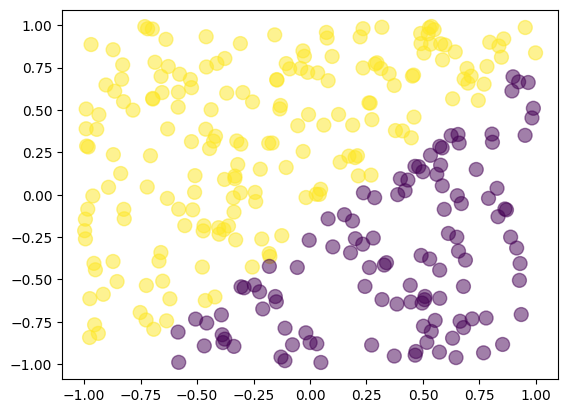

In [ ]:
# linearly separable data
X, Y = get_data()
plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
plt.show()

final w: [-4.61981568  4.71601709] final b: 1.0 epochs: 66 / 1000


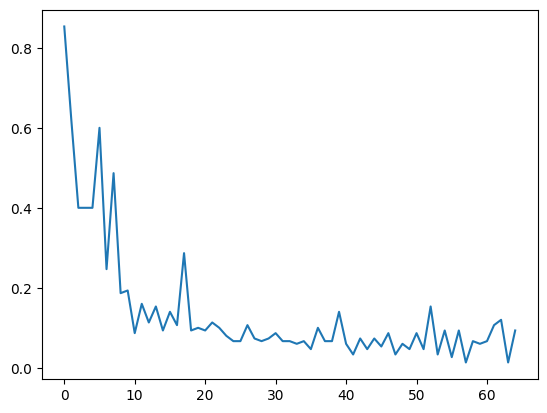

Training time: 0:00:00.219464
Train accuracy: 1.0
Time to compute train accuracy: 0:00:00.001473 Train size: 150
Test accuracy: 0.9933333333333333
Time to compute test accuracy: 0:00:00.001630 Test size: 150


In [ ]:
Ntrain = len(Y) // 2
Xtrain, Ytrain = X[:Ntrain], Y[:Ntrain]
Xtest, Ytest = X[Ntrain:], Y[Ntrain:]

model = Perceptron()
t0 = datetime.now()
model.fit(Xtrain, Ytrain)
print("Training time:", (datetime.now() - t0))

t0 = datetime.now()
print("Train accuracy:", model.score(Xtrain, Ytrain))
print("Time to compute train accuracy:", (datetime.now() - t0), "Train size:", len(Ytrain))

t0 = datetime.now()
print("Test accuracy:", model.score(Xtest, Ytest))
print("Time to compute test accuracy:", (datetime.now() - t0), "Test size:", len(Ytest))

XOR results:
final w: [ 0.00323599 -0.00715325] final b: -3.469446951953614e-18 epochs: 1000 / 1000


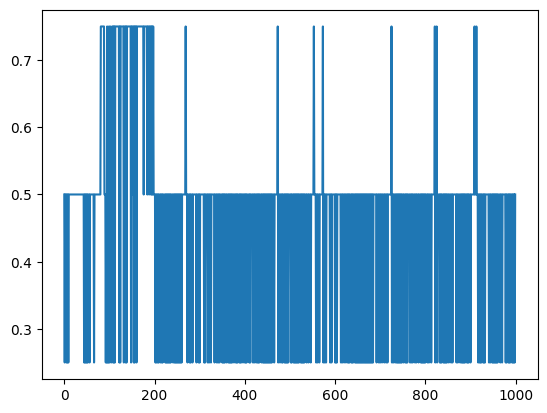

XOR accuracy: 0.75


In [ ]:
# xor data
print("XOR results:")
X, Y = get_simple_xor()
Y[Y == 0] = -1
model.fit(X, Y, learning_rate=1e-2)
print("XOR accuracy:", model.score(X, Y))